# Import Libraries

In [322]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [323]:
dataset = pd.read_csv("dataset_ml_final.csv")
dataset

,Sentiment,comment
0,2,به هیچ‌ وجه قصد توهین و بی ادبی ندارم ولی مشخص...
1,5,الان 1 سال هست که از این شارژر هر روز استفاده...
2,4,امروز از دیجی در تخفیف خریدم ، اول که زیپش را ...
3,3,این گوشی از لحاظ ساخت با اس 8 فرق زیادی نداره ...
4,4,درود\nمن یک تصادف جزئی داشتم که قسمتی از سپر ک...
...,...,...
9532,2,بوی بد پدسلولزی افتضاحه .اولی رو از دی جی کالا...
9533,3,من امروز این محصول بدستم رسید. همه چیش خوب بود...
9534,4,سطل زباله معمولا تو سرویس از بقیه زودتر خراب م...
9535,5,اول این که این محصول بسته بندی تمیز و مرتبی دا...


# Statistical Analysis

In [324]:
dict(dataset["Sentiment"].value_counts())

{5: 3186, 4: 2178, 2: 1726, 3: 1331, 1: 1116}

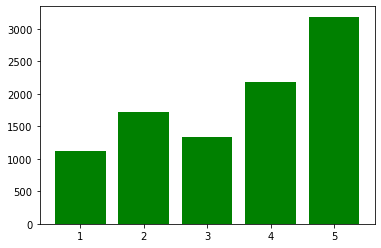

In [325]:
plt.bar(dict(dataset["Sentiment"].value_counts()).keys(), dict(dataset["Sentiment"].value_counts()).values(), color='g')
plt.show()

In [326]:
dataset["Sentiment"].value_counts().mean()

1907.4

# Create Balanced Dataset

In [327]:
sample_label_1 = dataset[dataset['Sentiment']==1].sample(n=int(dataset["Sentiment"].value_counts().mean()), replace=True)
# sample_label_1 = dataset[dataset['Sentiment']==1].sample(n=int(dataset["Sentiment"].value_counts().mean()) if \
#                                                          len(dataset[dataset['Sentiment']==1]) < int(dataset["Sentiment"].value_counts().mean()) else \
#                                                          len(dataset[dataset['Sentiment']==1]))


sample_label_2 = dataset[dataset['Sentiment']==2].sample(n=int(dataset["Sentiment"].value_counts().mean()), replace=True)
sample_label_3 = dataset[dataset['Sentiment']==3].sample(n=int(dataset["Sentiment"].value_counts().mean()), replace=True)
sample_label_4 = dataset[dataset['Sentiment']==4].sample(n=int(dataset["Sentiment"].value_counts().mean()))
sample_label_5 = dataset[dataset['Sentiment']==5].sample(n=int(dataset["Sentiment"].value_counts().mean()))

In [328]:
dataset_balanced = pd.concat([sample_label_1,sample_label_2,sample_label_3,sample_label_4,sample_label_5])
dataset_balanced

,Sentiment,comment
843,1,من امروز به دستم رسید انتخاب درستی نکردم
7692,1,ماندگاری بسیار ضعیف\nانگار اصلا اورجینال نیست
6661,1,ارزش خریذ نداره
6532,1,منکه هرچی صبر کردم خبری نشد،پولتونو دور نریزید...
1752,1,ظاهر خوبی داره ولی کفی داخل کفش اصلا خوب نیست ...
...,...,...
8068,5,۹۶۵۰ بی تی همه چی تمومه داشتنش لیاقت میخاد End...
4050,5,فوق العادست
6738,5,بخرید عالیه
3462,5,چند روزی هست که این گوشی رو گرفتم در حد قیمت خ...


In [329]:
dataset_balanced['Sentiment'].value_counts()

1    1907
2    1907
3    1907
4    1907
5    1907
Name: Sentiment, dtype: int64

In [330]:
from sklearn.utils import shuffle
dataset_balanced = shuffle(dataset_balanced)
dataset_balanced

,Sentiment,comment
3465,5,اگر به دنبال یک mp3 player کوچک و با کیفیت هست...
7866,4,دوستان توجه EndOfTitle سلام به دوستان گرامی دو...
9021,3,خیلی معمولی است و شاید از کارخونه کهنه بیرون م...
6696,2,ارزش خرید نداشت
2177,4,نسبت به قیمت و برند بودنش میرزه...
...,...,...
4387,2,موس خوبیه و اوایل مشکلی نداشت ولی بعد از چهار ...
2387,2,مث عکس نیس
2263,1,کمترین کارکرد بین هندزفریهایی که داشتم. بعد یه...
1692,4,خیلی قشنگه. اما آبی خیییییلی کمرنگه توی عکس مش...


# Preprocessing

In [331]:
def _multiple_replace(mapping, text):
    pattern = "|".join(map(re.escape, mapping.keys()))
    return re.sub(pattern, lambda m: mapping[m.group()], str(text))

In [332]:
def convert_fa_numbers(input_str):
    mapping = {
        '۰': '0',
        '۱': '1',
        '۲': '2',
        '۳': '3',
        '۴': '4',
        '۵': '5',
        '۶': '6',
        '۷': '7',
        '۸': '8',
        '۹': '9',
        '.': '.',
    }
    return _multiple_replace(mapping, input_str)

In [333]:
import string

def remove_special_characters(text):
  chars_to_ignore = [
    ",", "?", ".", "!", "-", ";", ":", '""', "%", "'", '"', "�",
    "#", "!", "؟", "?", "«", "»", "،", "(", ")", "؛", "'ٔ", "٬",'ٔ', ",", "?", 
    ".", "!", "-", ";", ":",'"',"“", "%", "‘", "”", "�", "–", "…", "_", "”", '“', '„',
    'ā', 'š',]
  chars_to_ignore = chars_to_ignore + list(string.ascii_lowercase + string.digits)
  chars_to_ignore_regex = f"""[{"".join(chars_to_ignore)}]"""
  text = re.sub(chars_to_ignore_regex, '', text).lower() + " "
  return text

In [334]:
def convert_special_characters(input_str):
  chars_to_mapping = {
    'ك': 'ک', 'دِ': 'د', 'بِ': 'ب', 'زِ': 'ز', 'ذِ': 'ذ', 'شِ': 'ش', 'سِ': 'س', 'ى': 'ی',
    'ي': 'ی', 'أ': 'ا', 'ؤ': 'و', "ے": "ی", "ۀ": "ه", "ﭘ": "پ", "ﮐ": "ک", "ﯽ": "ی",
    "ﺎ": "ا", "ﺑ": "ب", "ﺘ": "ت", "ﺧ": "خ", "ﺩ": "د", "ﺱ": "س", "ﻀ": "ض", "ﻌ": "ع",
    "ﻟ": "ل", "ﻡ": "م", "ﻢ": "م", "ﻪ": "ه", "ﻮ": "و", 'ﺍ': "ا", 'ة': "ه",
    'ﯾ': "ی", 'ﯿ': "ی", 'ﺒ': "ب", 'ﺖ': "ت", 'ﺪ': "د", 'ﺮ': "ر", 'ﺴ': "س", 'ﺷ': "ش",
    'ﺸ': "ش", 'ﻋ': "ع", 'ﻤ': "م", 'ﻥ': "ن", 'ﻧ': "ن", 'ﻭ': "و", 'ﺭ': "ر", "ﮔ": "گ",        
    "a": " ای ", "b": " بی ", "c": " سی ", "d": " دی ", "e": " ایی ", "f": " اف ",
    "g": " جی ", "h": " اچ ", "i": " آی ", "j": " جی ", "k": " کی ", "l": " ال ",
    "m": " ام ", "n": " ان ", "o": " او ", "p": " پی ", "q": " کیو ", "r": " آر ",
    "s": " اس ", "t": " تی ", "u": " یو ", "v": " وی ", "w": " دبلیو ", "x": " اکس ",
    "y": " وای ", "z": " زد ",
    "\u200c": " ", "\u200d": " ", "\u200e": " ", "\u200f": " ", "\ufeff": " ",
    }
  return _multiple_replace(chars_to_mapping, input_str)

In [335]:
!pip install hazm

In [336]:
import hazm
_normalizer = hazm.Normalizer()

def preprocess(text):  
  text = text.lower().strip()
  text = _normalizer.normalize(text)
  text = re.sub(r'\n', ' ', text)
  text = re.sub(r'[ـ_]', ' ', text)
  text = re.sub(r'[ؤ إ أة ك ء]',' ',text)
  text = re.sub(r'[\s]{2,}', ' ', text) # delete multiple \n \r \t \f \v
  text = re.sub(r'(\w)\1{2,}', r'\1',text) # delete multiple english charecters
  text = re.sub(r'([ٱ-ە])\1{2,}', r'\1',text) # delete multiple persian charecters
  text = remove_special_characters(text)
  text = convert_fa_numbers(text)
  text = convert_special_characters(text)
  return text

In [337]:
dataset_balanced['comment'] = dataset_balanced['comment'].apply(lambda x: preprocess(x))

In [338]:
complete_stopwords = []
file = open('persian-stopwords.txt',encoding='utf8')
Lines = file.readlines()
for line in Lines:
    complete_stopwords.append(line.strip())

In [339]:
def stopwords_remove(x):
    terms = x.split()
    terms = [w for w in terms if w not in complete_stopwords]
    sentence = ' '.join(terms)
    return sentence

In [340]:
dataset_balanced['Refined_comment'] = dataset_balanced['comment'].apply(lambda x: stopwords_remove(x))
average_len = dataset_balanced['Refined_comment'].str.len().mean()
dataset_balanced.drop(dataset_balanced[dataset_balanced['Refined_comment'].str.len() > average_len].index, inplace=True)
dataset_balanced

,Sentiment,comment,Refined_comment
6696,2,ارزش خرید نداشت,ارزش خرید نداشت
2177,4,نسبت به قیمت و برند بودنش میرزه,نسبت قیمت برند بودنش میرزه
7722,4,سایز های دیگر اگر سایز م بود حتما خریداری میک...,سایز های سایز م حتما خریداری میکردم
8401,3,میتوانم سفارش خود را در محل پرداخت کنم,میتوانم سفارش محل پرداخت کنم
3508,5,عالی از نظر کیفیت,عالی نظر کیفیت
...,...,...,...
4387,2,موس خوبیه و اوایل مشکلی نداشت ولی بعد از چهار ...,موس خوبیه اوایل مشکلی نداشت ماه دیگه اسکرولش ک...
2387,2,مث عکس نیس,مث عکس نیس
2263,1,کمترین کارکرد بین هندزفریهایی که داشتم بعد یه ...,کمترین کارکرد بین هندزفریهایی داشتم یه مدت یه ...
1692,4,خیلی قشنگه اما آبی خیلی کمرنگه توی عکس مشخص نی...,خیلی قشنگه آبی خیلی کمرنگه توی عکس مشخص نیست ا...


In [341]:
dataset_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6193 entries, 6696 to 1302
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sentiment        6193 non-null   int64 
 1   comment          6193 non-null   object
 2   Refined_comment  6193 non-null   object
dtypes: int64(1), object(2)
memory usage: 193.5+ KB


In [342]:
measurer = np.vectorize(len)
res1 = measurer(dataset_balanced.values.astype(str)).max(axis=0)

In [343]:
res1

array([  1, 150,  94])

# Train Model

In [344]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, ComplementNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [345]:
tfidf = TfidfVectorizer()
text_count_2 = tfidf.fit_transform(dataset_balanced['Refined_comment'])

In [346]:
x_train, x_test, y_train, y_test = train_test_split(text_count_2, dataset_balanced['Sentiment'],test_size=0.2,random_state=5)

In [347]:
MNB = MultinomialNB()
mnb_model = MNB.fit(x_train, y_train)

# Calculate Accuracy

In [348]:
accuracy_score_mnb = metrics.accuracy_score(MNB.predict(x_test), y_test)
print('accuracy_score_multi_nomial_naive_bayes = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')

accuracy_score_multi_nomial_naive_bayes = 76.84%


# Evaluate Model

In [349]:
mnb_cm = metrics.confusion_matrix(y_test, MNB.predict(x_test))

mnb_cm

array([[242,  10,   3,   2,  13],
       [ 45, 117,   7,  17,   4],
       [ 11,   8, 144,  21,  14],
       [ 14,  14,   5, 161,  53],
       [  7,   4,   4,  31, 288]], dtype=int64)

<AxesSubplot:>

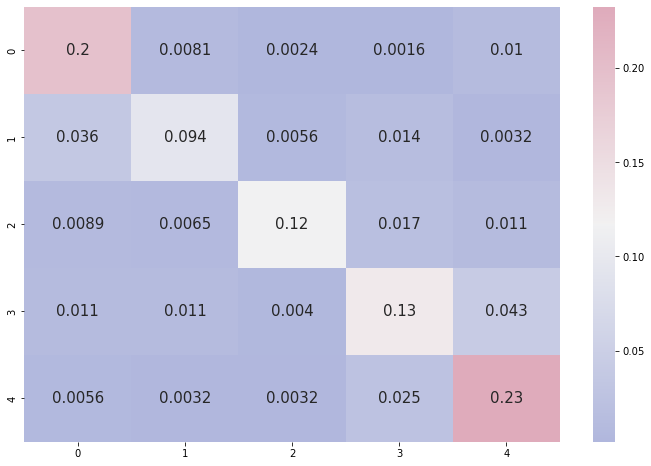

In [350]:
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
sns.heatmap(mnb_cm/np.sum(mnb_cm), cmap = cmap1, annot = True, annot_kws = {'size':15})

# Test

In [352]:
mnb_model.predict(tfidf.transform(["نظری ندارم"]))

array([3], dtype=int64)